# Matrice

In [1]:
import os
from zipfile import ZipFile

# nous supposons que la base d'image se trouve dans le répertoire "IA-Vision" de votre Drive
#zip_file_path = "/content/drive/MyDrive/P5/Matrices_Team.zip"
extracted_folder_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Base de données/Matrices_Team"

'''
with ZipFile(zip_file_path, 'r') as zip:
    zip.extractall(extracted_folder_path)
    print('Extraction terminée')
'''

folder_path = extracted_folder_path

print("Contenu du répertoire extrait :", os.listdir(extracted_folder_path))

Contenu du répertoire extrait : ['Società Sportiva Lazio S.p.A._2019.npy', 'Torino Calcio_2021.npy', 'Real Club Deportivo Mallorca S.A.D._2021.npy', 'West Ham United Football Club_2021.npy', '1. FC Union Berlin_2019.npy', 'Real Betis Balompié S.A.D._2022.npy', 'Futbol Club Barcelona_2018.npy', 'Real Club Celta de Vigo S. A. D._2020.npy', 'AS Saint-Étienne_2021.npy', 'Club Atlético de Madrid S.A.D._2018.npy', 'Crystal Palace Football Club_2022.npy', 'Chelsea Football Club_2020.npy', 'Bologna Football Club 1909_2020.npy', 'Unione Sportiva Lecce_2022.npy', 'Football Club Lorient-Bretagne Sud_2022.npy', 'Bologna Football Club 1909_2021.npy', 'Chelsea Football Club_2021.npy', 'U.S. Salernitana 1919 S.r.l._2022.npy', 'Paris Saint-Germain Football Club_2022.npy', 'AS Saint-Étienne_2020.npy', 'Real Club Celta de Vigo S. A. D._2021.npy', 'Club Atlético de Madrid S.A.D._2019.npy', 'Futbol Club Barcelona_2019.npy', 'West Ham United Football Club_2020.npy', 'Torino Calcio_2020.npy', 'Società Sport

In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, concatenate

In [3]:
csv_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Team_game_result10-1_forme.csv"  # Remplacez cela par le chemin réel de votre fichier CSV
data = pd.read_csv(csv_path)
data.head()

,Unnamed: 0,Home_Team,Away_Team,Result,Forme_dom,Forme_exte
0,0,Olympique de Marseille_2018,Toulouse Football Club_2018,1.0,0.0,0.0
1,1,Manchester United Football Club_2018,Leicester City_2018,1.0,0.0,0.0
2,2,Olympique Gymnaste Club Nice Côte d'Azur_2018,Stade de Reims_2018,-1.0,0.0,0.0
3,3,Wolverhampton Wanderers Football Club_2018,Everton Football Club_2018,0.0,0.0,0.0
4,4,Newcastle United Football Club_2018,Tottenham Hotspur Football Club_2018,-1.0,0.0,0.0


In [4]:
import os
import numpy as np

# Dossier contenant les matrices d'équipes
folder_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Base de données/Matrices_Team"

# Liste des fichiers dans le dossier
team_files = os.listdir(folder_path)

# Parcourir chaque fichier et afficher la forme de la matrice
for team_file in team_files:
    if team_file.endswith(".npy"):
        team_matrix = np.load(os.path.join(folder_path, team_file))
        matrix_shape = team_matrix.shape
print(f"Matrice {team_file} - Shape : {matrix_shape}")


Matrice Dijon FCO_2020.npy - Shape : (3, 4, 20)


In [5]:
X_combined_matrices = []
Y_results = []

for index, row in data.iterrows():
    home_team_name = row['Home_Team']
    away_team_name = row['Away_Team']
    home_coef = row['Forme_dom']
    away_coef = row['Forme_exte']
    result = row['Result']

    home_team_matrix = np.load(os.path.join(folder_path, f"{home_team_name}.npy"))
    away_team_matrix = np.load(os.path.join(folder_path, f"{away_team_name}.npy"))
    home_team_matrix = (home_team_matrix * (1 + home_coef))/20
    away_team_matrix = (away_team_matrix * (1 + away_coef))/20

    combined_matrix = np.concatenate([home_team_matrix, away_team_matrix], axis=0)

    X_combined_matrices.append(combined_matrix)
    Y_results.append(result)

# Convertir les listes en tableaux NumPy
X_combined = np.array(X_combined_matrices)
Y = np.array(Y_results)

print("X_combined shape:", X_combined.shape)
print("Y shape:", Y.shape)


X_combined shape: (8980, 6, 4, 20)
Y shape: (8980,)


In [6]:
D = data.to_numpy()
print(D[0])
print(X_combined[0][:,:,7])

[0 'Olympique de Marseille_2018' 'Toulouse Football Club_2018' 1.0 0.0 0.0]
[[0.   0.35 0.6  0.  ]
 [0.75 0.85 0.75 0.65]
 [0.7  0.75 0.9  0.5 ]
 [0.   0.6  0.7  0.  ]
 [0.55 0.7  0.65 0.65]
 [0.8  0.7  0.7  0.65]]


In [7]:
print(D[1289])
print(X_combined[1289][:,:,7])

[1289 'Olympique de Marseille_2018'
 "Olympique Gymnaste Club Nice Côte d'Azur_2018" 1.0 0.6666666666666666
 -0.1666666666666666]
[[0.         0.58333333 1.         0.        ]
 [1.25       1.41666667 1.25       1.08333333]
 [1.16666667 1.25       1.5        0.83333333]
 [0.         0.5        0.29166667 0.        ]
 [0.29166667 0.5        0.41666667 0.33333333]
 [0.41666667 0.5        0.58333333 0.66666667]]


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras import optimizers

# Taille des matrices d'équipes
input_shape = (6, 4, 20)

# Modèle CNN
model = Sequential([
    Conv2D(32, (2,2), strides=(2,2), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(64, (2,2), strides=(1,1), activation='relu', padding='same'),
    Conv2D(128, (3,3), strides=(1,1), activation='relu', padding='same'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()

2024-01-22 14:15:24.312522: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-22 14:15:24.312822: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 2, 32)          2592      
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 2, 64)          8256      
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 256)               196864    
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 282,339
Trai

In [9]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X_combined, Y, test_size=0.2)

# Entraîner le modèle
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/10


2024-01-22 14:15:31.169370: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-01-22 14:15:31.396595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


180/180 [==============================] - ETA: 0s - loss: 5200.1846 - accuracy: 0.3445

2024-01-22 14:15:36.964970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


180/180 [==============================] - 6s 14ms/step - loss: 5200.1846 - accuracy: 0.3445 - val_loss: 20659.0254 - val_accuracy: 0.4586
Epoch 2/10
180/180 [==============================] - 1s 8ms/step - loss: 486490.4375 - accuracy: 0.3463 - val_loss: 3037941.2500 - val_accuracy: 0.2289
Epoch 3/10
180/180 [==============================] - 1s 8ms/step - loss: 8798336.0000 - accuracy: 0.3372 - val_loss: 5985656.5000 - val_accuracy: 0.4586
Epoch 4/10
180/180 [==============================] - 1s 8ms/step - loss: 36094076.0000 - accuracy: 0.3259 - val_loss: 50160968.0000 - val_accuracy: 0.4586
Epoch 5/10
180/180 [==============================] - 1s 8ms/step - loss: 89343000.0000 - accuracy: 0.3431 - val_loss: 49407668.0000 - val_accuracy: 0.4586
Epoch 6/10
180/180 [==============================] - 1s 8ms/step - loss: 254127200.0000 - accuracy: 0.3351 - val_loss: 135209888.0000 - val_accuracy: 0.4586
Epoch 7/10
180/180 [==============================] - 1s 8ms/step - loss: 492524192.

<AxesSubplot: title={'center': 'Keketovic'}>

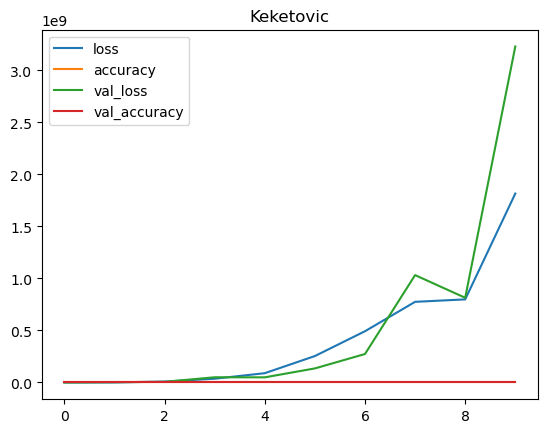

In [10]:
pd.DataFrame(history.history).plot(title="Keketovic")

In [11]:
import tensorflow as tf

In [12]:
VGG16 =  tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [13]:
VGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization, Conv2DTranspose
from tensorflow.keras import optimizers

# Taille des matrices d'équipes
input_shape = (6, 4, 20)

# Modèle CNN
model2 = Sequential([
    Conv2DTranspose(32, (2,2), strides=(2,3), activation='relu', padding='same', input_shape=input_shape),
    Conv2DTranspose(32, (3,3), strides=(1,1), activation='relu', input_shape=input_shape),
    Conv2DTranspose(32, (2,2), strides=(2,2), activation='relu', padding='same', input_shape=input_shape),
    Conv2DTranspose(32, (2,2), strides=(2,2), activation='relu', padding='same', input_shape=input_shape),
    Conv2DTranspose(32, (2,2), strides=(2,2), activation='relu', padding='same', input_shape=input_shape),
    Conv2DTranspose(3, (2,2), strides=(2,2), activation='relu', padding='same', input_shape=input_shape),
    VGG16,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

# Compiler le modèle
model2.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 12, 12, 32)       2592      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 14, 14, 32)       9248      
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 32)       4128      
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 56, 56, 32)       4128      
 ranspose)                                                       
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 112, 112, 32)    

In [15]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X_combined, Y, test_size=0.2)

# Entraîner le modèle
history = model2.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


2024-01-22 14:16:26.113338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


180/180 [==============================] - ETA: 0s - loss: 0.5562 - accuracy: 0.4352

2024-01-22 14:25:26.026363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


180/180 [==============================] - 572s 3s/step - loss: 0.5562 - accuracy: 0.4352 - val_loss: 0.4977 - val_accuracy: 0.4440
Epoch 2/10
 20/180 [==>...........................] - ETA: 8:32 - loss: 0.4724 - accuracy: 0.4266

KeyboardInterrupt: 

In [ ]:
# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model2.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

57/57 [==============================] - 9s 156ms/step - loss: 1.0734 - accuracy: 0.4360
Loss: 1.0734456777572632, Accuracy: 0.435968816280365


<Axes: title={'center': 'Keketovic'}>

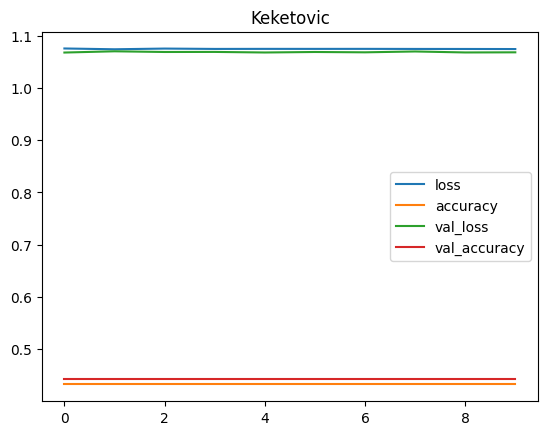

In [ ]:
pd.DataFrame(history.history).plot(title="Keketovic")

In [ ]:
vgg_model =  tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization, Conv2DTranspose
from tensorflow.keras import optimizers

# Taille des matrices d'équipes
input_shape = (6, 4, 20)

# Modèle CNN
model3 = Sequential([
    Conv2DTranspose(32, (2,2), strides=(2,3), activation='relu', padding='same', input_shape=input_shape),
    Conv2DTranspose(32, (3,3), strides=(1,1), activation='relu', input_shape=input_shape),
    Conv2DTranspose(32, (2,2), strides=(2,2), activation='relu', padding='same', input_shape=input_shape),
    Conv2DTranspose(32, (2,2), strides=(2,2), activation='relu', padding='same', input_shape=input_shape),
    Conv2DTranspose(32, (2,2), strides=(2,2), activation='relu', padding='same', input_shape=input_shape),
    Conv2DTranspose(3, (2,2), strides=(2,2), activation='relu', padding='same', input_shape=input_shape),
    vgg_model,
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compiler le modèle
model3.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_72 (Conv2  (None, 12, 12, 32)        2592      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_73 (Conv2  (None, 14, 14, 32)        9248      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_74 (Conv2  (None, 28, 28, 32)        4128      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_75 (Conv2  (None, 56, 56, 32)        4128      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_76 (Conv2  (None, 112, 112, 32)    

In [ ]:
# Freeze four convolution blocks
for layer in vgg_model.layers[2:21]:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_3 True
1 block1_conv1 True
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
19 flatten False
20 fc1 False
21 fc2 True
22 predictions True


In [ ]:
model3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_72 (Conv2  (None, 12, 12, 32)        2592      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_73 (Conv2  (None, 14, 14, 32)        9248      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_74 (Conv2  (None, 28, 28, 32)        4128      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_75 (Conv2  (None, 56, 56, 32)        4128      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_76 (Conv2  (None, 112, 112, 32)    

In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X_combined, Y, test_size=0.2)

# Entraîner le modèle
history = model3.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model3.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/10
180/180 [==============================] - 73s 359ms/step - loss: 1.0807 - accuracy: 0.4296 - val_loss: 1.0651 - val_accuracy: 0.4475
Epoch 2/10
180/180 [==============================] - 59s 328ms/step - loss: 1.0788 - accuracy: 0.4319 - val_loss: 1.0705 - val_accuracy: 0.4475
Epoch 3/10
180/180 [==============================] - 63s 351ms/step - loss: 1.0764 - accuracy: 0.4322 - val_loss: 1.0637 - val_accuracy: 0.4475
Epoch 4/10
180/180 [==============================] - 59s 327ms/step - loss: 1.0771 - accuracy: 0.4322 - val_loss: 1.0630 - val_accuracy: 0.4475
Epoch 5/10
180/180 [==============================] - 59s 326ms/step - loss: 1.0762 - accuracy: 0.4321 - val_loss: 1.0635 - val_accuracy: 0.4475
Epoch 6/10
180/180 [==============================] - 59s 326ms/step - loss: 1.0762 - accuracy: 0.4326 - val_loss: 1.0632 - val_accuracy: 0.4475
Epoch 7/10
180/180 [==============================] - 63s 351ms/step - loss: 1.0757 - accuracy: 0.4322 - val_loss: 1.0627 - val_ac

<Axes: title={'center': 'Keketovic'}>

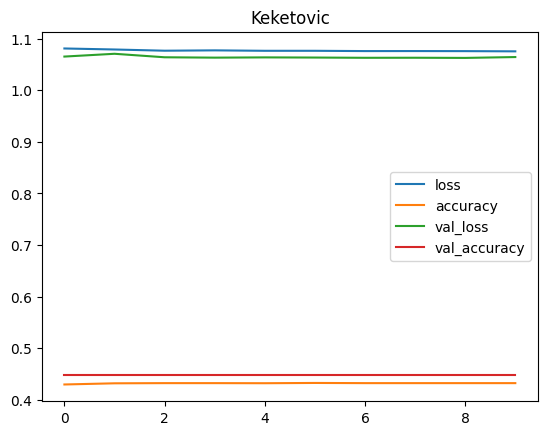

In [ ]:
pd.DataFrame(history.history).plot(title="Keketovic")

In [ ]:
D = data.to_numpy()

In [ ]:
D[5963]

array([5963, 'Manchester United Football Club_2021',
       'Brighton and Hove Albion Football Club_2021', 0.0], dtype=object)

In [ ]:
X_combined[5963][:,:,7]*20

array([[ 0.,  5., 14.,  0.],
       [11., 18., 12., 14.],
       [15., 15., 11., 13.],
       [ 0., 17., 13.,  0.],
       [ 9., 13., 15., 11.],
       [15., 13., 15.,  9.]])

In [ ]:
Y[5963]

0.0

# Vecteurs


In [53]:
import os
from zipfile import ZipFile

# nous supposons que la base d'image se trouve dans le répertoire "IA-Vision" de votre Drive
#zip_file_path = "/content/drive/MyDrive/P5/Matrices_Team.zip"
extracted_folder_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Base de données/Vecteurs_Team"

'''
with ZipFile(zip_file_path, 'r') as zip:
    zip.extractall(extracted_folder_path)
    print('Extraction terminée')
'''

folder_path = extracted_folder_path

print("Contenu du répertoire extrait :", os.listdir(extracted_folder_path))

Contenu du répertoire extrait : ['Società Sportiva Lazio S.p.A._2019.npy', 'Torino Calcio_2021.npy', 'Real Club Deportivo Mallorca S.A.D._2021.npy', 'West Ham United Football Club_2021.npy', '1. FC Union Berlin_2019.npy', 'Real Betis Balompié S.A.D._2022.npy', 'Futbol Club Barcelona_2018.npy', 'Real Club Celta de Vigo S. A. D._2020.npy', 'AS Saint-Étienne_2021.npy', 'Club Atlético de Madrid S.A.D._2018.npy', 'Crystal Palace Football Club_2022.npy', 'Chelsea Football Club_2020.npy', 'Bologna Football Club 1909_2020.npy', 'Unione Sportiva Lecce_2022.npy', 'Football Club Lorient-Bretagne Sud_2022.npy', 'Bologna Football Club 1909_2021.npy', 'Chelsea Football Club_2021.npy', 'U.S. Salernitana 1919 S.r.l._2022.npy', 'Paris Saint-Germain Football Club_2022.npy', 'AS Saint-Étienne_2020.npy', 'Real Club Celta de Vigo S. A. D._2021.npy', 'Club Atlético de Madrid S.A.D._2019.npy', 'Futbol Club Barcelona_2019.npy', 'West Ham United Football Club_2020.npy', 'Torino Calcio_2020.npy', 'Società Sport

In [54]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, concatenate

In [55]:
csv_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Team_game_result102_forme.csv"  # Remplacez cela par le chemin réel de votre fichier CSV
data = pd.read_csv(csv_path)
data.head()

,Unnamed: 0,Home_Team,Away_Team,Result,Forme_dom,Forme_exte
0,0,Olympique de Marseille_2018,Toulouse Football Club_2018,1.0,0.0,0.0
1,1,Manchester United Football Club_2018,Leicester City_2018,1.0,0.0,0.0
2,2,Olympique Gymnaste Club Nice Côte d'Azur_2018,Stade de Reims_2018,2.0,0.0,0.0
3,3,Wolverhampton Wanderers Football Club_2018,Everton Football Club_2018,0.0,0.0,0.0
4,4,Newcastle United Football Club_2018,Tottenham Hotspur Football Club_2018,2.0,0.0,0.0


In [56]:
import os
import numpy as np

# Dossier contenant les matrices d'équipes
folder_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Base de données/Vecteurs_Team"

# Liste des fichiers dans le dossier
team_files = os.listdir(folder_path)

# Parcourir chaque fichier et afficher la forme de la matrice
for team_file in team_files:
    if team_file.endswith(".npy"):
        team_matrix = np.load(os.path.join(folder_path, team_file))
        matrix_shape = team_matrix.shape
print(f"Vecteurs {team_file} - Shape : {matrix_shape}")

Vecteurs Dijon FCO_2020.npy - Shape : (220, 1)


In [57]:
X_combined_matrices = []
Y_results = []

for index, row in data.iterrows():
    home_team_name = row['Home_Team']
    away_team_name = row['Away_Team']
    home_coef = row['Forme_dom']
    away_coef = row['Forme_exte']
    result = row['Result']

    home_team_matrix = np.load(os.path.join(folder_path, f"{home_team_name}.npy"))
    away_team_matrix = np.load(os.path.join(folder_path, f"{away_team_name}.npy"))
    home_team_matrix = (home_team_matrix * (1 + home_coef))/20
    away_team_matrix = (away_team_matrix * (1 + away_coef))/20

    combined_matrix = np.concatenate([home_team_matrix, away_team_matrix], axis=0)

    X_combined_matrices.append(combined_matrix)
    Y_results.append(result)

# Convertir les listes en tableaux NumPy
X_combined = np.array(X_combined_matrices)
Y = np.array(Y_results)

print("X_combined shape:", X_combined.shape)
print("Y shape:", Y.shape)

X_combined shape: (8980, 440, 1)
Y shape: (8980,)


In [58]:
X_combined[4678]

array([[0.12],
       [0.12],
       [0.13],
       [0.13],
       [0.12],
       [0.17],
       [0.13],
       [0.12],
       [0.17],
       [0.14],
       [0.14],
       [0.01],
       [0.12],
       [0.06],
       [0.08],
       [0.12],
       [0.16],
       [0.14],
       [0.1 ],
       [0.15],
       [0.14],
       [0.15],
       [0.01],
       [0.07],
       [0.06],
       [0.08],
       [0.07],
       [0.12],
       [0.15],
       [0.09],
       [0.12],
       [0.13],
       [0.11],
       [0.11],
       [0.11],
       [0.12],
       [0.11],
       [0.13],
       [0.14],
       [0.15],
       [0.14],
       [0.15],
       [0.12],
       [0.13],
       [0.02],
       [0.14],
       [0.17],
       [0.15],
       [0.15],
       [0.01],
       [0.07],
       [0.14],
       [0.05],
       [0.05],
       [0.05],
       [0.09],
       [0.12],
       [0.12],
       [0.12],
       [0.1 ],
       [0.17],
       [0.14],
       [0.13],
       [0.15],
       [0.14],
       [0.14],
       [0.

In [59]:
X_combined = X_combined.reshape((-1,440))

In [60]:
X_combined[4678]

array([0.12, 0.12, 0.13, 0.13, 0.12, 0.17, 0.13, 0.12, 0.17, 0.14, 0.14,
       0.01, 0.12, 0.06, 0.08, 0.12, 0.16, 0.14, 0.1 , 0.15, 0.14, 0.15,
       0.01, 0.07, 0.06, 0.08, 0.07, 0.12, 0.15, 0.09, 0.12, 0.13, 0.11,
       0.11, 0.11, 0.12, 0.11, 0.13, 0.14, 0.15, 0.14, 0.15, 0.12, 0.13,
       0.02, 0.14, 0.17, 0.15, 0.15, 0.01, 0.07, 0.14, 0.05, 0.05, 0.05,
       0.09, 0.12, 0.12, 0.12, 0.1 , 0.17, 0.14, 0.13, 0.15, 0.14, 0.14,
       0.01, 0.09, 0.04, 0.09, 0.09, 0.14, 0.11, 0.11, 0.13, 0.16, 0.14,
       0.08, 0.14, 0.15, 0.15, 0.1 , 0.05, 0.15, 0.15, 0.09, 0.11, 0.11,
       0.14, 0.13, 0.17, 0.16, 0.13, 0.1 , 0.15, 0.14, 0.11, 0.13, 0.13,
       0.01, 0.16, 0.1 , 0.08, 0.13, 0.14, 0.15, 0.1 , 0.12, 0.13, 0.14,
       0.13, 0.12, 0.14, 0.1 , 0.13, 0.07, 0.13, 0.12, 0.13, 0.14, 0.12,
       0.13, 0.14, 0.16, 0.12, 0.12, 0.06, 0.16, 0.14, 0.12, 0.15, 0.15,
       0.13, 0.1 , 0.15, 0.14, 0.14, 0.01, 0.1 , 0.14, 0.07, 0.1 , 0.04,
       0.13, 0.12, 0.16, 0.12, 0.11, 0.14, 0.16, 0.

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_combined, Y, test_size=0.2)

In [62]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

In [63]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax', "num_class" : 3}
param['nthread'] = 4
param['eval_metric'] = 'auc'

evallist = [(dtrain, 'train'), (dtest, 'eval')]

In [66]:
num_round = 100
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	train-auc:0.62202	eval-auc:0.59033
[1]	train-auc:0.64235	eval-auc:0.60954
[2]	train-auc:0.65148	eval-auc:0.61480
[3]	train-auc:0.65913	eval-auc:0.61536
[4]	train-auc:0.66758	eval-auc:0.61468
[5]	train-auc:0.67472	eval-auc:0.61541
[6]	train-auc:0.68139	eval-auc:0.61429
[7]	train-auc:0.68470	eval-auc:0.61493
[8]	train-auc:0.69038	eval-auc:0.61658
[9]	train-auc:0.69494	eval-auc:0.61662
[10]	train-auc:0.69936	eval-auc:0.61606
[11]	train-auc:0.70522	eval-auc:0.61759
[12]	train-auc:0.71034	eval-auc:0.61446
[13]	train-auc:0.71342	eval-auc:0.61403
[14]	train-auc:0.71835	eval-auc:0.61433
[15]	train-auc:0.72208	eval-auc:0.61714
[16]	train-auc:0.72645	eval-auc:0.61659
[17]	train-auc:0.72974	eval-auc:0.61534
[18]	train-auc:0.73410	eval-auc:0.61556
[19]	train-auc:0.73698	eval-auc:0.61495
[20]	train-auc:0.73958	eval-auc:0.61459
[21]	train-auc:0.74304	eval-auc:0.61550
[22]	train-auc:0.74715	eval-auc:0.61472
[23]	train-auc:0.75082	eval-auc:0.61415
[24]	train-auc:0.75413	eval-auc:0.61255
[25]	train

In [75]:
ypred = bst.predict(dtest,"strict_shape" == True)


In [76]:
ypred


array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [77]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softprob', "num_class" : 3}
param['nthread'] = 4
param['eval_metric'] = 'auc'

evallist = [(dtrain, 'train'), (dtest, 'eval')]

In [78]:
num_round = 100
bst2 = xgb.train(param, dtrain, num_round, evallist)

[0]	train-auc:0.62202	eval-auc:0.59033
[1]	train-auc:0.64235	eval-auc:0.60954
[2]	train-auc:0.65148	eval-auc:0.61480
[3]	train-auc:0.65913	eval-auc:0.61536
[4]	train-auc:0.66758	eval-auc:0.61468
[5]	train-auc:0.67472	eval-auc:0.61541
[6]	train-auc:0.68139	eval-auc:0.61429
[7]	train-auc:0.68470	eval-auc:0.61493
[8]	train-auc:0.69038	eval-auc:0.61658
[9]	train-auc:0.69494	eval-auc:0.61662
[10]	train-auc:0.69936	eval-auc:0.61606
[11]	train-auc:0.70522	eval-auc:0.61759
[12]	train-auc:0.71034	eval-auc:0.61446
[13]	train-auc:0.71342	eval-auc:0.61403
[14]	train-auc:0.71835	eval-auc:0.61433
[15]	train-auc:0.72208	eval-auc:0.61714
[16]	train-auc:0.72645	eval-auc:0.61659
[17]	train-auc:0.72974	eval-auc:0.61534
[18]	train-auc:0.73410	eval-auc:0.61556
[19]	train-auc:0.73698	eval-auc:0.61495
[20]	train-auc:0.73958	eval-auc:0.61459
[21]	train-auc:0.74304	eval-auc:0.61550
[22]	train-auc:0.74715	eval-auc:0.61472
[23]	train-auc:0.75082	eval-auc:0.61415
[24]	train-auc:0.75413	eval-auc:0.61255
[25]	train

In [79]:
ypred = bst2.predict(dtest)

In [80]:
ypred

array([[0.10989578, 0.7474495 , 0.1426547 ],
       [0.22340065, 0.6122081 , 0.16439123],
       [0.11648802, 0.6310571 , 0.25245485],
       ...,
       [0.188853  , 0.48396027, 0.32718676],
       [0.17926301, 0.5594496 , 0.2612874 ],
       [0.31504813, 0.38945016, 0.29550168]], dtype=float32)

In [83]:
1/ypred

array([[9.09953  , 1.337883 , 7.0099335],
       [4.4762626, 1.6334314, 6.0830493],
       [8.584574 , 1.5846426, 3.9611044],
       ...,
       [5.295124 , 2.0662854, 3.0563583],
       [5.578396 , 1.787471 , 3.8272035],
       [3.1741183, 2.5677226, 3.3840756]], dtype=float32)

# Test Prédiction Premier league 2022 XGBoost

In [47]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, concatenate

In [48]:
csv_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Team_game_result102_forme_sans_GB12022.csv"  # Remplacez cela par le chemin réel de votre fichier CSV
data = pd.read_csv(csv_path)
data.head()

,Unnamed: 0,Home_Team,Away_Team,Result,Forme_dom,Forme_exte
0,0,Olympique de Marseille_2018,Toulouse Football Club_2018,1.0,0.0,0.0
1,1,Manchester United Football Club_2018,Leicester City_2018,1.0,0.0,0.0
2,2,Olympique Gymnaste Club Nice Côte d'Azur_2018,Stade de Reims_2018,2.0,0.0,0.0
3,3,Wolverhampton Wanderers Football Club_2018,Everton Football Club_2018,0.0,0.0,0.0
4,4,Newcastle United Football Club_2018,Tottenham Hotspur Football Club_2018,2.0,0.0,0.0


In [49]:
import os
import numpy as np

# Dossier contenant les matrices d'équipes
folder_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Base de données/Vecteurs_Team"

# Liste des fichiers dans le dossier
team_files = os.listdir(folder_path)

# Parcourir chaque fichier et afficher la forme de la matrice
for team_file in team_files:
    if team_file.endswith(".npy"):
        team_matrix = np.load(os.path.join(folder_path, team_file))
        matrix_shape = team_matrix.shape
print(f"Vecteurs {team_file} - Shape : {matrix_shape}")

Vecteurs Dijon FCO_2020.npy - Shape : (220, 1)


In [50]:
X_combined_matrices = []
Y_results = []

for index, row in data.iterrows():
    home_team_name = row['Home_Team']
    away_team_name = row['Away_Team']
    home_coef = row['Forme_dom']
    away_coef = row['Forme_exte']
    result = row['Result']

    home_team_matrix = np.load(os.path.join(folder_path, f"{home_team_name}.npy"))
    away_team_matrix = np.load(os.path.join(folder_path, f"{away_team_name}.npy"))
    home_team_matrix = (home_team_matrix * (1 + home_coef))/20
    away_team_matrix = (away_team_matrix * (1 + away_coef))/20

    combined_matrix = np.concatenate([home_team_matrix, away_team_matrix], axis=0)

    X_combined_matrices.append(combined_matrix)
    Y_results.append(result)

# Convertir les listes en tableaux NumPy
X_combined = np.array(X_combined_matrices)
Y = np.array(Y_results)
X_combined = X_combined.reshape((-1,440))

print("X_combined shape:", X_combined.shape)
print("Y shape:", Y.shape)

X_combined shape: (8600, 440)
Y shape: (8600,)


In [51]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

X_train, X_test, Y_train, Y_test = train_test_split(X_combined, Y, test_size=0.05)

dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

In [52]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softprob', "num_class" : 3}
param['nthread'] = 4
param['eval_metric'] = 'auc'

evallist = [(dtrain, 'train'), (dtest, 'eval')]

In [53]:
num_round = 30
bst3 = xgb.train(param, dtrain, num_round, evallist)

[0]	train-auc:0.61711	eval-auc:0.60898
[1]	train-auc:0.63767	eval-auc:0.62675
[2]	train-auc:0.64559	eval-auc:0.63172
[3]	train-auc:0.65308	eval-auc:0.62968
[4]	train-auc:0.66051	eval-auc:0.62459
[5]	train-auc:0.66607	eval-auc:0.62275
[6]	train-auc:0.67089	eval-auc:0.62687
[7]	train-auc:0.67743	eval-auc:0.62253
[8]	train-auc:0.67974	eval-auc:0.63121


/Users/mathieu/env/lib/python3.8/site-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[9]	train-auc:0.68360	eval-auc:0.62146
[10]	train-auc:0.68671	eval-auc:0.62025
[11]	train-auc:0.69110	eval-auc:0.62202
[12]	train-auc:0.69546	eval-auc:0.63022
[13]	train-auc:0.69892	eval-auc:0.63262
[14]	train-auc:0.70293	eval-auc:0.62951
[15]	train-auc:0.70563	eval-auc:0.63009
[16]	train-auc:0.70967	eval-auc:0.63116
[17]	train-auc:0.71355	eval-auc:0.63205
[18]	train-auc:0.71804	eval-auc:0.62939
[19]	train-auc:0.72177	eval-auc:0.62892
[20]	train-auc:0.72543	eval-auc:0.62668
[21]	train-auc:0.73000	eval-auc:0.62567
[22]	train-auc:0.73344	eval-auc:0.63217
[23]	train-auc:0.73776	eval-auc:0.63494
[24]	train-auc:0.74122	eval-auc:0.63322
[25]	train-auc:0.74491	eval-auc:0.63515
[26]	train-auc:0.74793	eval-auc:0.63738
[27]	train-auc:0.75071	eval-auc:0.63849
[28]	train-auc:0.75230	eval-auc:0.63780
[29]	train-auc:0.75410	eval-auc:0.63316


In [54]:
csv_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Team_game_result102_forme_QUE_GB12022.csv"  # Remplacez cela par le chemin réel de votre fichier CSV
data = pd.read_csv(csv_path)
data.head()

,Unnamed: 0,Home_Team,Away_Team,Forme_dom,Forme_exte
0,0,Crystal Palace Football Club_2022,Arsenal Football Club_2022,0.0,0.0
1,1,Fulham Football Club_2022,Liverpool Football Club_2022,0.0,0.0
2,2,Everton Football Club_2022,Chelsea Football Club_2022,0.0,0.0
3,3,Association Football Club Bournemouth_2022,Aston Villa Football Club_2022,0.0,0.0
4,4,Tottenham Hotspur Football Club_2022,Southampton FC_2022,0.0,0.0


In [55]:
import os
import numpy as np

# Dossier contenant les matrices d'équipes
folder_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Base de données/Vecteurs_Team"

# Liste des fichiers dans le dossier
team_files = os.listdir(folder_path)

# Parcourir chaque fichier et afficher la forme de la matrice
for team_file in team_files:
    if team_file.endswith(".npy"):
        team_matrix = np.load(os.path.join(folder_path, team_file))
        matrix_shape = team_matrix.shape
print(f"Vecteurs {team_file} - Shape : {matrix_shape}")

Vecteurs Dijon FCO_2020.npy - Shape : (220, 1)


In [56]:
X_combined_matrices = []

for index, row in data.iterrows():
    home_team_name = row['Home_Team']
    away_team_name = row['Away_Team']
    home_coef = row['Forme_dom']
    away_coef = row['Forme_exte']

    home_team_matrix = np.load(os.path.join(folder_path, f"{home_team_name}.npy"))
    away_team_matrix = np.load(os.path.join(folder_path, f"{away_team_name}.npy"))
    home_team_matrix = (home_team_matrix * (1 + home_coef))/20
    away_team_matrix = (away_team_matrix * (1 + away_coef))/20

    combined_matrix = np.concatenate([home_team_matrix, away_team_matrix], axis=0)

    X_combined_matrices.append(combined_matrix)

# Convertir les listes en tableaux NumPy
X_combined = np.array(X_combined_matrices)
X_combined = X_combined.reshape((-1,440))

print("X_combined shape:", X_combined.shape)


X_combined shape: (380, 440)


In [57]:
deval = xgb.DMatrix(X_combined)

In [58]:
ypred = bst3.predict(deval)

In [59]:
ypred = 1/ypred

In [60]:
d = data.to_numpy()
y = np.hstack((ypred[:,1:2],ypred[:,0:1]))
y = np.hstack((y,ypred[:,2:]))
Sortie = np.hstack((d[:,1:3],y))

In [61]:
DF = pd.DataFrame(Sortie,columns=["Home_Team","Away_Team","Côte domicile","Côte nul","Côte extérieur"])

# save the dataframe as a csv file
DF.to_csv("Prédiction5.csv")

In [18]:
y

array([[2.6292014, 5.736786 , 2.2454615],
       [4.9835634, 5.687506 , 1.6038072],
       [2.778388 , 4.5750065, 2.3724785],
       ...,
       [3.5507479, 4.6495423, 1.9869092],
       [4.4687233, 3.4681168, 2.049678 ],
       [1.8815495, 2.9510982, 7.7121086]], dtype=float32)

In [121]:
X_combined[0]*20

array([11., 12., 13., 12., 13., 14., 14., 14., 15., 13., 13.,  3., 13.,
        9., 11., 10., 17., 17., 12., 16., 14., 13.,  3.,  6.,  6.,  9.,
        5., 13., 14.,  9., 11., 15., 15., 12., 14., 15., 12., 12., 14.,
       11., 15., 15., 11., 10.,  2., 17., 14., 15., 15.,  6.,  6., 13.,
        8.,  8.,  6., 10., 12., 14., 13., 13., 15., 15., 14., 15., 14.,
       13.,  2.,  8.,  8.,  8.,  4., 13., 14., 12., 13., 11., 11.,  9.,
       15., 12., 10., 13.,  8., 13., 13.,  6.,  9., 12., 13., 13., 15.,
       14., 14., 13., 12., 14., 11., 13., 13.,  2., 13., 11.,  9., 13.,
       12., 13., 12., 13., 14., 14., 12., 13., 13., 13., 12., 14., 14.,
       13., 14., 12., 12., 11., 15., 14., 13., 15., 14., 12., 14., 11.,
       11., 12., 16., 14., 14., 14., 14.,  8.,  8., 14., 10.,  8., 10.,
       13., 14., 15., 14., 13., 16., 15., 12., 13., 13., 13., 11., 15.,
       12., 14., 16., 12., 12., 14., 12., 12., 14., 10., 15., 13., 15.,
       13., 13., 15., 13., 15., 15., 14., 14., 14., 13., 14., 15

In [120]:
d[0]

array([0, 'Crystal Palace Football Club_2022',
       'Arsenal Football Club_2022', 0.0, 0.0], dtype=object)

# Test prédiction premier league Conv1


In [36]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, concatenate

In [21]:
csv_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Team_game_result102_forme_sans_GB12022.csv"  # Remplacez cela par le chemin réel de votre fichier CSV
data = pd.read_csv(csv_path)
data.head()

,Unnamed: 0,Home_Team,Away_Team,Result,Forme_dom,Forme_exte
0,0,Olympique de Marseille_2018,Toulouse Football Club_2018,1.0,0.0,0.0
1,1,Manchester United Football Club_2018,Leicester City_2018,1.0,0.0,0.0
2,2,Olympique Gymnaste Club Nice Côte d'Azur_2018,Stade de Reims_2018,2.0,0.0,0.0
3,3,Wolverhampton Wanderers Football Club_2018,Everton Football Club_2018,0.0,0.0,0.0
4,4,Newcastle United Football Club_2018,Tottenham Hotspur Football Club_2018,2.0,0.0,0.0


In [22]:
import os
import numpy as np

# Dossier contenant les matrices d'équipes
folder_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Base de données/Matrices_Team"

# Liste des fichiers dans le dossier
team_files = os.listdir(folder_path)

# Parcourir chaque fichier et afficher la forme de la matrice
for team_file in team_files:
    if team_file.endswith(".npy"):
        team_matrix = np.load(os.path.join(folder_path, team_file))
        matrix_shape = team_matrix.shape
print(f"Vecteurs {team_file} - Shape : {matrix_shape}")

Vecteurs Dijon FCO_2020.npy - Shape : (3, 4, 20)


In [23]:
X_combined_matrices = []
Y_results = []

for index, row in data.iterrows():
    home_team_name = row['Home_Team']
    away_team_name = row['Away_Team']
    home_coef = row['Forme_dom']
    away_coef = row['Forme_exte']
    result = row['Result']

    home_team_matrix = np.load(os.path.join(folder_path, f"{home_team_name}.npy"))
    away_team_matrix = np.load(os.path.join(folder_path, f"{away_team_name}.npy"))
    home_team_matrix = (home_team_matrix * (1 + home_coef))/20
    away_team_matrix = (away_team_matrix * (1 + away_coef))/20

    combined_matrix = np.concatenate([home_team_matrix, away_team_matrix], axis=0)

    X_combined_matrices.append(combined_matrix)
    Y_results.append(result)

# Convertir les listes en tableaux NumPy
X_combined = np.array(X_combined_matrices)
Y = np.array(Y_results)

print("X_combined shape:", X_combined.shape)
print("Y shape:", Y.shape)

X_combined shape: (8600, 6, 4, 20)
Y shape: (8600,)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras import optimizers

# Taille des matrices d'équipes
input_shape = (6, 4, 20)

# Modèle CNN
model = Sequential([
    Conv2D(32, (2,2), strides=(2,2), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(64, (2,2), strides=(1,1), activation='relu', padding='same'),
    Conv2D(128, (3,3), strides=(1,1), activation='relu', padding='same'),
    Flatten(),
    Dense(256, activation='relu'),
    
    Dense(3, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()

Metal device set to: Apple M1


2024-01-23 10:17:06.263975: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-23 10:17:06.265556: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 2, 32)          2592      
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 2, 64)          8256      
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 256)               196864    
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 282,339
Trainable params: 282,339
Non-trai

In [25]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X_combined, Y, test_size=0.05)

# Entraîner le modèle
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/100


2024-01-23 10:17:59.743765: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-01-23 10:18:00.119132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


205/205 [==============================] - ETA: 0s - loss: 1.0441 - accuracy: 0.4812

2024-01-23 10:18:03.683187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


205/205 [==============================] - 5s 20ms/step - loss: 1.0441 - accuracy: 0.4812 - val_loss: 1.0541 - val_accuracy: 0.4486
Epoch 2/100
205/205 [==============================] - 2s 12ms/step - loss: 1.0365 - accuracy: 0.4855 - val_loss: 1.0467 - val_accuracy: 0.4523
Epoch 3/100
205/205 [==============================] - 2s 11ms/step - loss: 1.0356 - accuracy: 0.4862 - val_loss: 1.0698 - val_accuracy: 0.4510
Epoch 4/100
205/205 [==============================] - 2s 12ms/step - loss: 1.0328 - accuracy: 0.4890 - val_loss: 1.0571 - val_accuracy: 0.4541
Epoch 5/100
205/205 [==============================] - 2s 12ms/step - loss: 1.0311 - accuracy: 0.4894 - val_loss: 1.0458 - val_accuracy: 0.4584
Epoch 6/100
205/205 [==============================] - 2s 11ms/step - loss: 1.0293 - accuracy: 0.4882 - val_loss: 1.0431 - val_accuracy: 0.4700
Epoch 7/100
205/205 [==============================] - 2s 12ms/step - loss: 1.0260 - accuracy: 0.4950 - val_loss: 1.0427 - val_accuracy: 0.4614
Epoc

<AxesSubplot: title={'center': 'Truc'}>

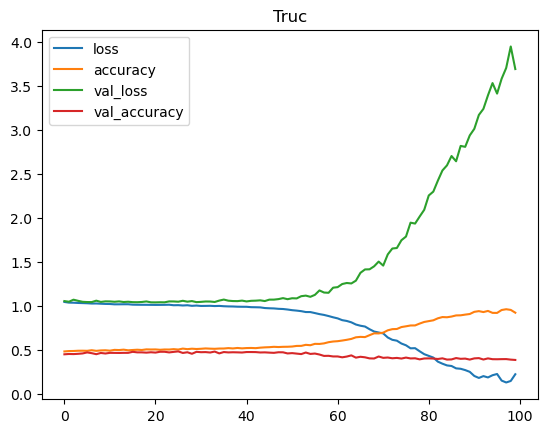

In [35]:
pd.DataFrame(history.history).plot(title="Truc")

In [26]:
csv_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Team_game_result102_forme_QUE_GB12022.csv"  # Remplacez cela par le chemin réel de votre fichier CSV
data = pd.read_csv(csv_path)
data.head()

import os
import numpy as np

# Dossier contenant les matrices d'équipes
folder_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Base de données/Matrices_Team"

# Liste des fichiers dans le dossier
team_files = os.listdir(folder_path)

# Parcourir chaque fichier et afficher la forme de la matrice
for team_file in team_files:
    if team_file.endswith(".npy"):
        team_matrix = np.load(os.path.join(folder_path, team_file))
        matrix_shape = team_matrix.shape
print(f"Vecteurs {team_file} - Shape : {matrix_shape}")

,Unnamed: 0,Home_Team,Away_Team,Forme_dom,Forme_exte
0,0,Crystal Palace Football Club_2022,Arsenal Football Club_2022,0.0,0.0
1,1,Fulham Football Club_2022,Liverpool Football Club_2022,0.0,0.0
2,2,Everton Football Club_2022,Chelsea Football Club_2022,0.0,0.0
3,3,Association Football Club Bournemouth_2022,Aston Villa Football Club_2022,0.0,0.0
4,4,Tottenham Hotspur Football Club_2022,Southampton FC_2022,0.0,0.0


In [27]:
X_combined_matrices = []

for index, row in data.iterrows():
    home_team_name = row['Home_Team']
    away_team_name = row['Away_Team']
    home_coef = row['Forme_dom']
    away_coef = row['Forme_exte']

    home_team_matrix = np.load(os.path.join(folder_path, f"{home_team_name}.npy"))
    away_team_matrix = np.load(os.path.join(folder_path, f"{away_team_name}.npy"))
    home_team_matrix = (home_team_matrix * (1 + home_coef))/20
    away_team_matrix = (away_team_matrix * (1 + away_coef))/20

    combined_matrix = np.concatenate([home_team_matrix, away_team_matrix], axis=0)

    X_combined_matrices.append(combined_matrix)

# Convertir les listes en tableaux NumPy
X_combined = np.array(X_combined_matrices)

print("X_combined shape:", X_combined.shape)


X_combined shape: (380, 6, 4, 20)


In [33]:
ypred = model.predict(X_combined)

ypred = 1/ypred
print(ypred)

[[1.5131939e+04 4.2813184e+02 1.0024077e+00]
 [4.3006378e+02 5.8769436e+01 1.0197223e+00]
 [9.2117499e+02 1.0942899e+00 1.1753676e+01]
 ...
 [5.9963318e+02 1.0016705e+00 1.6697008e+08]
 [3.6958230e+00 4.0951748e+01 1.4184291e+00]
 [2.5456732e+02 1.4915620e+00 3.0709352e+00]]


In [34]:
d = data.to_numpy()
y = np.hstack((ypred[:,1:2],ypred[:,0:1]))
y = np.hstack((y,ypred[:,2:]))
Sortie = np.hstack((d[:,1:3],y))

DF = pd.DataFrame(Sortie,columns=["Home_Team","Away_Team","Côte domicile","Côte nul","Côte extérieur"])

# save the dataframe as a csv file
DF.to_csv("Prédiction2.csv")

# Test prédiction premier league Conv2

In [39]:
csv_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Team_game_result102_forme_sans_GB12022.csv"  # Remplacez cela par le chemin réel de votre fichier CSV
data = pd.read_csv(csv_path)
data.head()


import os
import numpy as np

# Dossier contenant les matrices d'équipes
folder_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Base de données/Matrices_Team"

# Liste des fichiers dans le dossier
team_files = os.listdir(folder_path)

# Parcourir chaque fichier et afficher la forme de la matrice
for team_file in team_files:
    if team_file.endswith(".npy"):
        team_matrix = np.load(os.path.join(folder_path, team_file))
        matrix_shape = team_matrix.shape
print(f"Vecteurs {team_file} - Shape : {matrix_shape}")


X_combined_matrices = []
Y_results = []

for index, row in data.iterrows():
    home_team_name = row['Home_Team']
    away_team_name = row['Away_Team']
    home_coef = row['Forme_dom']
    away_coef = row['Forme_exte']
    result = row['Result']

    home_team_matrix = np.load(os.path.join(folder_path, f"{home_team_name}.npy"))
    away_team_matrix = np.load(os.path.join(folder_path, f"{away_team_name}.npy"))
    home_team_matrix = (home_team_matrix * (1 + home_coef))/20
    away_team_matrix = (away_team_matrix * (1 + away_coef))/20

    combined_matrix = np.concatenate([home_team_matrix, away_team_matrix], axis=0)

    X_combined_matrices.append(combined_matrix)
    Y_results.append(result)

# Convertir les listes en tableaux NumPy
X_combined = np.array(X_combined_matrices)
Y = np.array(Y_results)

print("X_combined shape:", X_combined.shape)
print("Y shape:", Y.shape)

Vecteurs Dijon FCO_2020.npy - Shape : (3, 4, 20)
X_combined shape: (8600, 6, 4, 20)
Y shape: (8600,)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras import optimizers

# Taille des matrices d'équipes
input_shape = (6, 4, 20)

# Modèle CNN
model = Sequential([
    Conv2D(32, (2,2), strides=(2,2), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(64, (2,2), strides=(1,1), activation='relu', padding='same'),
    Conv2D(128, (3,3), strides=(1,1), activation='relu', padding='same'),
    Flatten(),
    Dense(256, activation='relu'),
    
    Dense(3, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 3, 2, 32)          2592      
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 2, 64)          8256      
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 2, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 768)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               196864    
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 282,339
Trainable params: 282,339
Non-tr

In [41]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X_combined, Y, test_size=0.05)

# Entraîner le modèle
history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.2)

# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/30


2024-01-23 10:59:52.230925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


205/205 [==============================] - ETA: 0s - loss: 1.0465 - accuracy: 0.4729

2024-01-23 10:59:54.808053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


205/205 [==============================] - 3s 14ms/step - loss: 1.0465 - accuracy: 0.4729 - val_loss: 1.0438 - val_accuracy: 0.4761
Epoch 2/30
205/205 [==============================] - 2s 12ms/step - loss: 1.0455 - accuracy: 0.4763 - val_loss: 1.0317 - val_accuracy: 0.4945
Epoch 3/30
205/205 [==============================] - 2s 12ms/step - loss: 1.0369 - accuracy: 0.4797 - val_loss: 1.0316 - val_accuracy: 0.4920
Epoch 4/30
205/205 [==============================] - 2s 12ms/step - loss: 1.0368 - accuracy: 0.4832 - val_loss: 1.0313 - val_accuracy: 0.4884
Epoch 5/30
205/205 [==============================] - 2s 11ms/step - loss: 1.0332 - accuracy: 0.4827 - val_loss: 1.0450 - val_accuracy: 0.4847
Epoch 6/30
205/205 [==============================] - 2s 11ms/step - loss: 1.0316 - accuracy: 0.4882 - val_loss: 1.0196 - val_accuracy: 0.5061
Epoch 7/30
205/205 [==============================] - 2s 12ms/step - loss: 1.0291 - accuracy: 0.4838 - val_loss: 1.0233 - val_accuracy: 0.5012
Epoch 8/30

<AxesSubplot: title={'center': 'Truc'}>

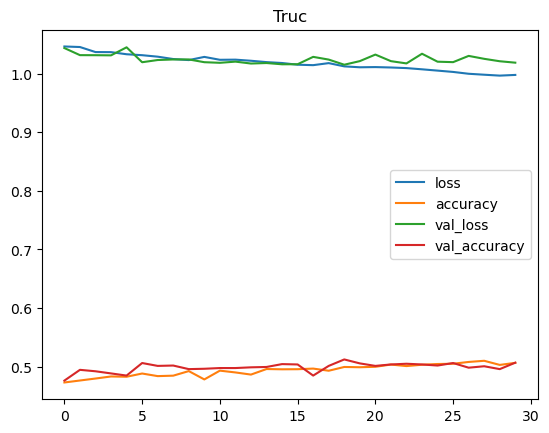

In [42]:
pd.DataFrame(history.history).plot(title="Truc")

In [45]:
csv_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Team_game_result102_forme_QUE_GB12022.csv"  # Remplacez cela par le chemin réel de votre fichier CSV
data = pd.read_csv(csv_path)
data.head()

import os
import numpy as np

# Dossier contenant les matrices d'équipes
folder_path = "/Users/mathieu/Documents/IMT M2/Projet P5 - Foot Predictor/Base de données/Matrices_Team"

# Liste des fichiers dans le dossier
team_files = os.listdir(folder_path)

# Parcourir chaque fichier et afficher la forme de la matrice
for team_file in team_files:
    if team_file.endswith(".npy"):
        team_matrix = np.load(os.path.join(folder_path, team_file))
        matrix_shape = team_matrix.shape
print(f"Vecteurs {team_file} - Shape : {matrix_shape}")

X_combined_matrices = []

for index, row in data.iterrows():
    home_team_name = row['Home_Team']
    away_team_name = row['Away_Team']
    home_coef = row['Forme_dom']
    away_coef = row['Forme_exte']

    home_team_matrix = np.load(os.path.join(folder_path, f"{home_team_name}.npy"))
    away_team_matrix = np.load(os.path.join(folder_path, f"{away_team_name}.npy"))
    home_team_matrix = (home_team_matrix * (1 + home_coef))/20
    away_team_matrix = (away_team_matrix * (1 + away_coef))/20

    combined_matrix = np.concatenate([home_team_matrix, away_team_matrix], axis=0)

    X_combined_matrices.append(combined_matrix)

# Convertir les listes en tableaux NumPy
X_combined = np.array(X_combined_matrices)

print("X_combined shape:", X_combined.shape)

ypred = model.predict(X_combined)

ypred = 1/ypred
print(ypred)

Vecteurs Dijon FCO_2020.npy - Shape : (3, 4, 20)
X_combined shape: (380, 6, 4, 20)
12/12 [==============================] - 0s 3ms/step
[[3.4804945 2.5870829 3.066085 ]
 [3.24963   3.2951233 2.5720568]
 [3.3904555 2.5977654 3.123944 ]
 ...
 [5.2568836 5.1756463 1.6219004]
 [4.9115634 4.0182776 1.8263639]
 [5.1660833 1.4976611 7.2086635]]


In [46]:
d = data.to_numpy()
y = np.hstack((ypred[:,1:2],ypred[:,0:1]))
y = np.hstack((y,ypred[:,2:]))
Sortie = np.hstack((d[:,1:3],y))

DF = pd.DataFrame(Sortie,columns=["Home_Team","Away_Team","Côte domicile","Côte nul","Côte extérieur"])

# save the dataframe as a csv file
DF.to_csv("Prédiction3.csv")